<a href="https://colab.research.google.com/github/MatheusFranzener/analise-sentimento-twitter/blob/main/analise_sentimento_tt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importando a biblioteca pandas muito utilizada no datascience
import pandas as pd

#lendo nosso arquivo que contem a dataset
data = pd.read_csv("NoThemeTweets.csv")

#mostrando os 5 primeiros valores
data.head()

In [8]:
# importando a biblioteca CountVectorizer, que irá vetorizar nossos tweets
from sklearn.feature_extraction.text import CountVectorizer

# criando uma variável que irá conter nosso vetor
vetorizador = CountVectorizer()

# criando uma "bag of words", transforma um bloco de texto para outro formato que poderá ser utilizado para o treinamento
bow = vetorizador.fit_transform(data.tweet_text)

# criando um "vocabulario/dicionario" para essas bag of words
palavras_tratadas = vetorizador.get_feature_names_out()

In [12]:
# bibioteca utilizada para teste de sentimento ( separa em base de teste e base de treino )
from sklearn.model_selection import train_test_split

# criando a nossa base de teste e de treino
teste, treino, teste_sentimento, treino_sentimento = train_test_split(bow, data.sentiment)

In [ ]:
# biblioteca utilizada para o treinamento dos dados
from sklearn.linear_model import LogisticRegression

# iniciando a variável de testes do LogisticRegression
lr = LogisticRegression()

# fit é utilizado para realizar o treinamento, passando as variável
lr.fit(treino, treino_sentimento)

# calculando a acuracia do teste (métrica)
acuracia = lr.score(teste, teste_sentimento)
acuracia

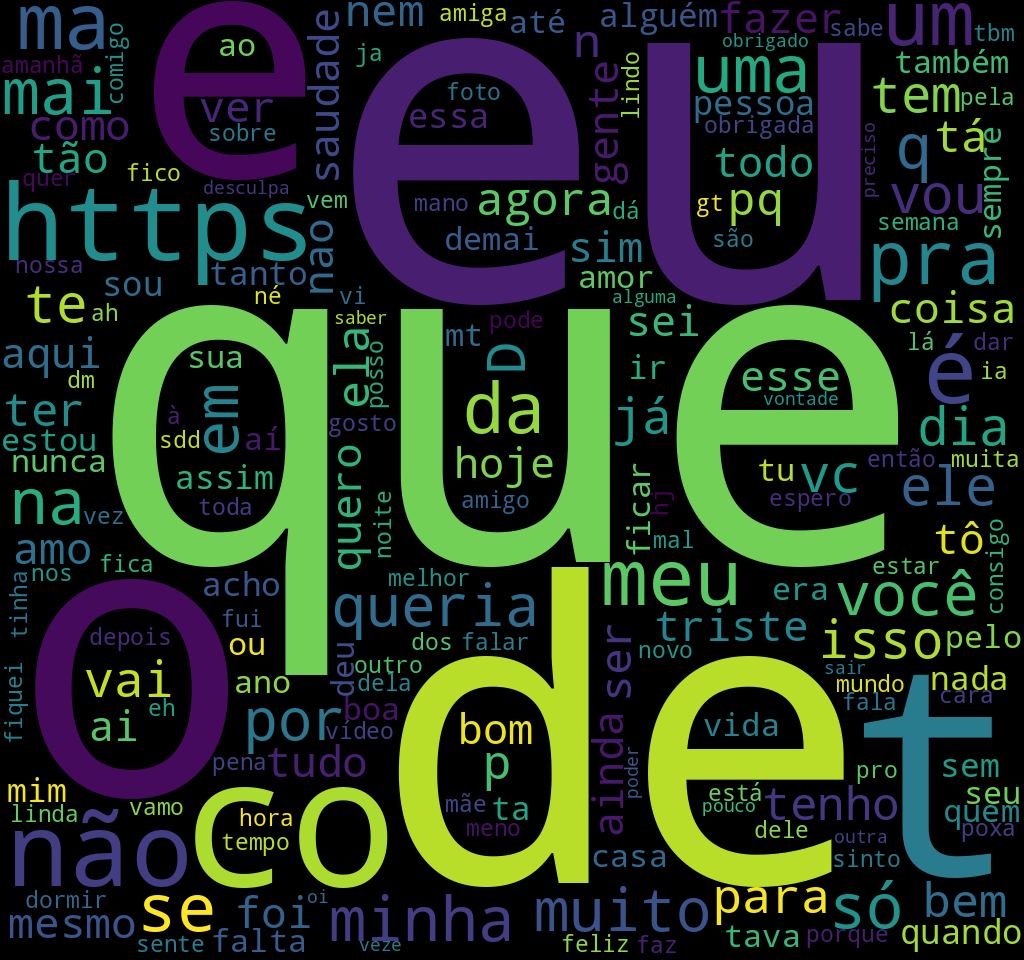

In [14]:
# biblioteca para nuvem de palavras
from wordcloud import WordCloud

# pega todos os comentários e cria uma string para a nuvem de palavras
texto = " ".join([comentario for comentario in data.tweet_text])

# variável utilizada pra gerar uma nuvem de palavras a partir da variável 'texto'
nuvem_palavras = WordCloud(width=1024,height=960, collocations=False).generate(texto)

# gerando uma imagem para visualização da nuvem de palavras
nuvem_palavras.to_image()